## Секция Импорта библиотек



In [1]:
import numpy as np                  
import matplotlib.pyplot as plt      
import random                        

from keras.datasets import mnist     # MNIST dataset 
from tensorflow.keras.models import Sequential  # Model Нейронной сети

from tensorflow.keras.layers import Dense, Dropout, Activation # Функции Активации и Слои нейронной сети
from keras.utils import np_utils                      

2022-10-18 13:35:16.266841: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-18 13:35:16.363504: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-18 13:35:16.392429: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-18 13:35:16.890002: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.applications import InceptionV3

### Обучить перодвинутую архитектуру с 0 будет очень трудно, так как она имеет большое кол-во параметров.

Давайте попробуем использовать уже обученные нейронные сети для классификации произвольных картинок

In [4]:
# Импорт бибилиотек
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import urllib
import cv2
import matplotlib.pyplot as plt
import imageio as io


def predict_image(model_name, image_source):
  
  # Будем использовать этот словарь для выбора модели
  MODELS = {
    "vgg16": VGG16,
    "vgg19": VGG19,
    "inception": InceptionV3,
    "xception": Xception, 
    "resnet": ResNet50
  }
# Определяем входной размер
  input_shape = (224, 224)

  preprocess = imagenet_utils.preprocess_input
  if model_name in ("inception", "xception"):
    input_shape = (299, 299)
    preprocess = preprocess_input

  print("[INFO] loading {}...".format(model_name))
  
  Network = MODELS[model_name]
  model = Network(weights="imagenet") #Мы будем использовать уже обученную нейронную сеть на наборе ImageNet, чтобы сделать выполнить предсказания
  
  print("[INFO] loading and pre-processing image...")
  if type(image_source) == str:
    image = load_img(image_source, target_size=input_shape)
    image = np.resize(image, (input_shape[0], input_shape[1], 3))
    image = img_to_array(image)
  else:
    image = np.resize(image_source, (input_shape[0], input_shape[1], 3))
    image = img_to_array(image)

  image = np.expand_dims(image, axis=0)
  image = preprocess(image)

  print("[INFO] classifying image with '{}'...".format(model_name))
  preds = model.predict(image)
  P = imagenet_utils.decode_predictions(preds)
# ТОП 5 предсказаний
  for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))
  img = io.imread(image_source)
  (imagenetID, label, prob) = P[0][0]
  cv2.putText(img, "Label: {}, {:.2f}%".format(label, prob * 100), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
  plt.imshow(img)
  plt.axis('off')
  
  return model

In [5]:
!wget https://image.ibb.co/cuw6pd/soccer_ball.jpg
!wget https://image.ibb.co/hdoVFJ/bmw.png
!wget https://image.ibb.co/h0B6pd/boat.png
!wget https://image.ibb.co/eCyVFJ/clint_eastwood.jpg

/bin/bash: /home/leysh/miniconda3/envs/tf/lib/python3.9/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
wget: /home/leysh/miniconda3/envs/tf/lib/python3.9/site-packages/cv2/../../../../lib/libuuid.so.1: no version information available (required by wget)
--2022-10-18 13:35:17--  https://image.ibb.co/cuw6pd/soccer_ball.jpg
Распознаётся image.ibb.co (image.ibb.co)… 51.210.32.132, 217.182.228.53, 51.210.32.106, ...
Подключение к image.ibb.co (image.ibb.co)|51.210.32.132|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 37935 (37K) [image/jpeg]
Сохранение в: ‘soccer_ball.jpg.1’

soccer_ball.jpg.1   100%[===================>]  37,05K  --.-KB/s    за 0,09s   

2022-10-18 13:35:18 (421 KB/s) - ‘soccer_ball.jpg.1’ сохранён [37935/37935]

/bin/bash: /home/leysh/miniconda3/envs/tf/lib/python3.9/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
wget

[INFO] loading vgg19...


2022-10-18 13:35:21.008422: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-18 13:35:21.019678: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-18 13:35:21.019745: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-18 13:35:21.020232: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow 

[INFO] loading and pre-processing image...
[INFO] classifying image with 'vgg19'...


2022-10-18 13:35:25.376737: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-10-18 13:35:26.621556: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-10-18 13:35:26.692381: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-10-18 13:35:26.692464: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-10-18 13:35:26.770287: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-10-18 13:35:26.770404: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 4s 4s/step
1. convertible: 91.76%
2. sports_car: 4.98%
3. limousine: 1.06%
4. car_wheel: 0.75%
5. beach_wagon: 0.41%


2022-10-18 13:35:28.809250: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
/tmp/ipykernel_4540/2821479.py:59: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = io.imread(image_source)


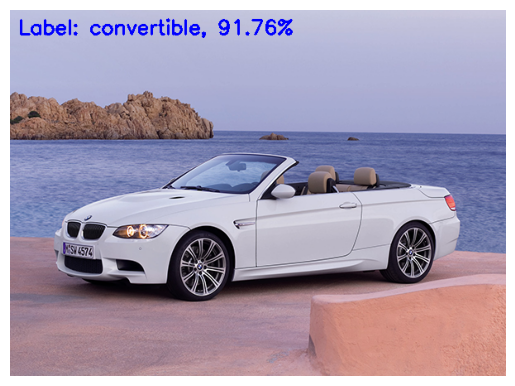

In [6]:
model = predict_image('vgg19', 'bmw.png')

In [7]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Transfer Learning

In [8]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
import tensorflow as tf
from tensorflow.keras.datasets import mnist  
from tensorflow import keras
from tensorflow.keras import layers as L
from tensorflow.keras.models import Sequential
import  numpy as np


def change_size(image):
    img = array_to_img(image, scale=False) #returns PIL Image
    img = img.resize((75, 75)) #resize image
    img = img.convert(mode='RGB') #makes 3 channels
    arr = img_to_array(img) #convert back to array
    return arr.astype(np.float64)

In [9]:
model = Sequential()

model.add(tf.keras.applications.resnet50.ResNet50(input_shape = (75, 75, 3), 
                                include_top = False, 
                                weights = 'imagenet'))

model.add(L.Flatten()) #2048
model.add(L.Dense(128, activation='relu'))
model.add(L.Dense(10, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 8s 0us/step


/home/leysh/miniconda3/envs/tf/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 128)               2359424   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 25,948,426
Trainable params: 25,895,306
Non-trainable params: 53,120
_________________________________________________________________


In [11]:
for layer in model.layers[0].layers:
    if layer.name == 'conv5_block1_0_conv':
        break
    layer.trainable=False

In [12]:
model.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          verbose=1)

NameError: name 'X_train' is not defined

In [ ]:
model.evaluate(X_test,y_test)

## Загружаем тренировочные данные


In [13]:
#  60,000 28 x 28 pixel тренировочные изображения и  10,000 28 x 28 pixel тестовые изображения
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [1]:
X_test = np.array(X_test).reshape(-1, 28, 28, 1)
X_test = [change_size(img) for img in X_test]
X_test = np.array(X_test)
X_test.shape

y_test = tf.keras.utils.to_categorical(y_test)

NameError: name 'np' is not defined

In [15]:


X_train = np.array(X_train[:30000]).reshape(-1, 28, 28, 1)
X_train = [change_size(img) for img in X_train]
X_train = np.array(X_train)
X_train.shape

: 

: 

In [ ]:
Y_train = tf.keras.utils.to_categorical(y_train)[:30000] # one-hot encoding

AlexNet Pytorch Модель

In [ ]:
import torch
import torch.nn as nn

class AlexNet(nn.Module):
    def __init__(self, num_classes: int = 1000) -> None:
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )

        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x